# Exploring the Relationship Between Hospital Costs and Quality Ratings in California

For my personal project, I’m analyzing the relationship between hospital costs and quality ratings in California. Using a .csv file from data.medicare.gov/data/hospital-compare, which includes identifying information for each hospital (such as Provider ID, Hospital Name, Phone Number, etc.) along with Medicare-determined quality metrics (like Overall rating, national comparison, safety of care, etc.), I aim to uncover trends and correlations.

My analysis reveals a significant negative correlation between overall rating and total cost, indicating that higher costs are associated with lower overall ratings. Additionally, while there is a slight negative correlation between total cost and timeliness of care, this relationship is not statistically significant. These findings suggest that higher costs do not necessarily equate to better patient experiences or timeliness of care. This analysis is based on hospitals in California, and expanding the dataset to include hospitals nationwide could provide further insight.

**Get the List of Hospitals**

In [4]:
import pandas as pd
import numpy as np
# Get the unique hospital names
hosp_info = pd.read_csv('HospInfo.csv')
hosp_names = hosp_info[
    (hosp_info['Hospital Type'] == 'Acute Care Hospitals') &
    (hosp_info['State'] == 'CA')]
hosp_names['Hospital Name'].tolist()

['SAN GORGONIO MEMORIAL HOSPITAL',
 'WHITE MEMORIAL MEDICAL CENTER',
 'KAISER FOUNDATION HOSPITAL - LOS ANGELES',
 'COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA',
 'HOAG MEMORIAL HOSPITAL PRESBYTERIAN',
 'MERCY MEDICAL CENTER REDDING',
 'SUTTER ROSEVILLE MEDICAL CENTER',
 'EDEN MEDICAL CENTER',
 'SONOMA DEVELOPMENTAL CENTER',
 'MISSION HOSPITAL REGIONAL MED CENTER',
 'MENIFEE VALLEY MEDICAL CENTER',
 'LAC/RANCHO LOS AMIGOS NATIONAL REHABILITATION  CTR',
 'ST JOHNS REGIONAL MEDICAL CENTER',
 'METHODIST HOSPITAL OF SOUTHERN CA',
 'RIVERSIDE COMMUNITY HOSPITAL',
 'JOHN MUIR MEDICAL CENTER - WALNUT CREEK CAMPUS',
 'ARROWHEAD REGIONAL MEDICAL CENTER',
 'SAN RAMON REGIONAL MEDICAL CTR',
 'KAISER FOUNDATION HOSPITAL - FRESNO',
 'ST JOSEPH HOSPITAL',
 'SANTA MONICA - UCLA MED CTR & ORTHOPAEDIC HOSPITAL',
 'MIRACLE MILE MEDICAL CENTER',
 'FEATHER RIVER HOSPITAL',
 'MARINA DEL REY HOSPITAL',
 'KAISER FOUNDATION HOSPITAL - WALNUT CREEK',
 'PETALUMA VALLEY HOSPITAL',
 'METHODIST HOSPITAL OF SACRAM

**Let's take a look at the data!**

In [6]:
hosp_info

,Provider ID,Hospital Name,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Readmission national comparison footnote,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness of care national comparison,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location
0,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,MARSHALL,2565938310,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Below the national average,NaN,"2505 U S HIGHWAY 431 NORTH\nBOAZ, AL\n"
1,10012,DEKALB REGIONAL MEDICAL CENTER,200 MED CENTER DRIVE,FORT PAYNE,AL,35968,DE KALB,2568453150,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"200 MED CENTER DRIVE\nFORT PAYNE, AL\n"
2,10032,WEDOWEE HOSPITAL,209 NORTH MAIN STREET,WEDOWEE,AL,36278,RANDOLPH,2563572111,Acute Care Hospitals,Government - Hospital District or Authority,...,NaN,Not Available,Results are not available for this reporting p...,Same as the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"209 NORTH MAIN STREET\nWEDOWEE, AL\n"
3,10095,HALE COUNTY HOSPITAL,508 GREEN STREET,GREENSBORO,AL,36744,HALE,3346243024,Acute Care Hospitals,Government - Local,...,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,"508 GREEN STREET\nGREENSBORO, AL\n"
4,10131,CRESTWOOD MEDICAL CENTER,ONE HOSPITAL DR SE,HUNTSVILLE,AL,35801,MADISON,2568823100,Acute Care Hospitals,Proprietary,...,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"ONE HOSPITAL DR SE\nHUNTSVILLE, AL\n"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807,450617,CLEAR LAKE REGIONAL MEDICAL CENTER,500 MEDICAL CENTER BLVD,WEBSTER,TX,77598,HARRIS,2813322511,Acute Care Hospitals,Proprietary,...,NaN,Below the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"500 MEDICAL CENTER BLVD\nWEBSTER, TX\n(29.5410..."
4808,520194,ORTHOPAEDIC HOSPITAL OF WISCONSIN,475 W RIVER WOODS PKWY,GLENDALE,WI,53212,MILWAUKEE,4149616800,Acute Care Hospitals,Voluntary non-profit - Other,...,Results are not available for this reporting p...,Above the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"475 W RIVER WOODS PKWY\nGLENDALE, WI\n(43.0982..."
4809,491302,CARILION GILES COMMUNITY HOSPITAL,159 HARTLEY WAY,PEARISBURG,VA,24134,GILES,5409216000,Critical Access Hospitals,Voluntary non-profit - Private,...,NaN,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,"159 HARTLEY WAY\nPEARISBURG, VA\n(37.332697, -..."
4810,510012,PLEASANT VALLEY HOSPITAL,2520 VALLEY DRIVE,POINT PLEASANT,WV,25550,MASON,3046754340,Acute Care Hospitals,Voluntary non-profit - Private,...,NaN,Same as the national average,NaN,Below the national average,NaN,Above the national average,NaN,Same as the national average,NaN,"2520 VALLEY DRIVE\nPOINT PLEASANT, WV\n(38.868..."


**Let's renames columns, filters rows for California hospitals, converts ratings to numeric, and drops rows with missing ratings in the hosp_info DataFrame.**

In [8]:
hosp_info_CA = (hosp_info.rename(columns={
    'Hospital Name': 'Hospital',
    'Provider ID': 'Provider_ID',
    'Safety of care national comparison': 'Safety',
    'Effectiveness of care national comparison': 'Effectiveness',
})
                        .loc[(hosp_info['Hospital Name'].isin(hosp_names['Hospital Name'])) & (hosp_info['State'] == 'CA')])
hosp_info_CA['Overall_Rating'] = pd.to_numeric(hosp_info['Hospital overall rating'], errors = 'coerce')   
hosp_info_CA.dropna(subset=['Overall_Rating'], inplace=True)             

hosp_info_CA

,Provider_ID,Hospital,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Patient experience national comparison,Patient experience national comparison footnote,Effectiveness,Effectiveness of care national comparison footnote,Timeliness of care national comparison,Timeliness of care national comparison footnote,Efficient use of medical imaging national comparison,Efficient use of medical imaging national comparison footnote,Location,Overall_Rating
24,50054,SAN GORGONIO MEMORIAL HOSPITAL,600 NORTH HIGHLAND SPRINGS AVENUE,BANNING,CA,92220,RIVERSIDE,9518451121,Acute Care Hospitals,Government - Hospital District or Authority,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,"600 NORTH HIGHLAND SPRINGS AVENUE\nBANNING, CA\n",2.0
25,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,LOS ANGELES,3232685000,Acute Care Hospitals,Voluntary non-profit - Church,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"1720 E CESAR AVENUE\nLOS ANGELES, CA\n",3.0
26,50138,KAISER FOUNDATION HOSPITAL - LOS ANGELES,4867 SUNSET BLVD,LOS ANGELES,CA,90027,LOS ANGELES,3237834011,Acute Care Hospitals,Voluntary non-profit - Other,...,Below the national average,NaN,Same as the national average,NaN,Not Available,Results are not available for this reporting p...,Not Available,Results are not available for this reporting p...,"4867 SUNSET BLVD\nLOS ANGELES, CA\n",3.0
27,50145,COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA,23625 W R HOLMAN HIGHWAY,MONTEREY,CA,93940,MONTEREY,8316245311,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Above the national average,NaN,"23625 W R HOLMAN HIGHWAY\nMONTEREY, CA\n",5.0
28,50224,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,ONE HOAG DRIVE,NEWPORT BEACH,CA,92663,ORANGE,9497644624,Acute Care Hospitals,Voluntary non-profit - Private,...,Above the national average,NaN,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,"ONE HOAG DRIVE\nNEWPORT BEACH, CA\n",4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324,50292,RIVERSIDE UNIVERSITY HEALTH SYSTEM-MEDICAL CENTER,26520 CACTUS AVENUE,MORENO VALLEY,CA,92555,RIVERSIDE,9514864000,Acute Care Hospitals,Government - Local,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Not Available,Results are not available for this reporting p...,"26520 CACTUS AVENUE\nMORENO VALLEY, CA\n(33.91...",3.0
1327,50350,BEVERLY HOSPITAL,309 W BEVERLY BLVD,MONTEBELLO,CA,90640,LOS ANGELES,3237261222,Acute Care Hospitals,Voluntary non-profit - Private,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"309 W BEVERLY BLVD\nMONTEBELLO, CA\n(34.016032...",3.0
1339,50426,WEST ANAHEIM MEDICAL CENTER,3033 W ORANGE AVENUE,ANAHEIM,CA,92804,ORANGE,7148273000,Acute Care Hospitals,Proprietary,...,Below the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"3033 W ORANGE AVENUE\nANAHEIM, CA\n(33.824735,...",3.0
1346,50231,POMONA VALLEY HOSPITAL MEDICAL CENTER,1798 N GAREY AVE,POMONA,CA,91767,LOS ANGELES,9098659500,Acute Care Hospitals,Voluntary non-profit - Private,...,Same as the national average,NaN,Same as the national average,NaN,Below the national average,NaN,Same as the national average,NaN,"1798 N GAREY AVE\nPOMONA, CA\n(34.077639, -117...",3.0


**Which hospitals charge the most/least?**

To help investigate hospital costs in California. The dataset contains identifying information for the hospital (Provider ID, Hospital Name, Address, Zip Code), the diagnosis-related group (DRG), and associated costs (Average Total Payments, Average Medicare Payments)

*Average Total Payments*:
The average of Medicare payments to the provider for the DRG including the DRG amount, teaching,  disproportionate share, capital, and outlier payments for all cases. Also included are co-payment and deductible amounts that the patient is responsible for. 


**Lets look at the costs of these hospitals in a new dataframe!**

In [11]:
costs = pd.read_csv("Inpatient_Prospective_Payment_System__IPPS__Provider_Summary_for_the_Top_100_Diagnosis-Related_Groups__DRG__-_FY2011.csv")
costs

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44
...,...,...,...,...,...,...,...,...,...,...,...,...
163060,948 - SIGNS & SYMPTOMS W/O MCC,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39
163061,948 - SIGNS & SYMPTOMS W/O MCC,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72
163062,948 - SIGNS & SYMPTOMS W/O MCC,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36
163063,948 - SIGNS & SYMPTOMS W/O MCC,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54


**I will Separate the DRG Definition column so that the DRG code and the DRG defintion are in separate columns.**

In [13]:
#Rename the columns within the 'costs' dataframe to be cleaner and easier to understand.
costs = costs.rename(columns = {'DRG Definition': 'DRG',
                               ' Average Total Payments ': 'Total_Cost',
                               ' Total Discharges ': 'Count_Discharges'})

#Create two new columns from the newly named DRG column. Separate the DRG code from its DRG defintion. Create two new columns to better explain the 
#data: 'DRG_Code' and 'DRG_Description. 
costs[['DRG_Code', 'DRG_Description']] = costs['DRG'].str.split(' - ', expand = True)
costs = costs.drop(['DRG'], axis = 1)

#Create a new column within the cost data frame 'Avg_DRG_Cost' that contains the average total cost for each DRG_Code.
costs['Avg_DRG_Cost'] = costs.groupby('DRG_Code')['Total_Cost'].transform(np.mean)

#Create a new column 'Cost_Diff' that contains the difference between the total_cost and Avg_DRG_Cost for each entry.
costs['Cost_Diff'] = costs['Total_Cost'] - costs['Avg_DRG_Cost']

costs

C:\Users\sinim\AppData\Local\Temp\ipykernel_113040\770227575.py:12: FutureWarning: The provided callable <function mean at 0x00000291268EAD40> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  costs['Avg_DRG_Cost'] = costs.groupby('DRG_Code')['Total_Cost'].transform(np.mean)


,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region Description,Count_Discharges,Average Covered Charges,Total_Cost,Average Medicare Payments,DRG_Code,DRG_Description,Avg_DRG_Cost,Cost_Diff
0,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,-1183.294004
1,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,-1172.964004
2,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,-1525.584004
3,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,-1542.974004
4,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,039,EXTRACRANIAL PROCEDURES W/O CC/MCC,6960.534004,-1302.204004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163060,670041,SETON MEDICAL CENTER WILLIAMSON,201 SETON PARKWAY,ROUND ROCK,TX,78664,TX - Austin,23,26314.39,3806.86,3071.39,948,SIGNS & SYMPTOMS W/O MCC,4824.766436,-1017.906436
163061,670055,METHODIST STONE OAK HOSPITAL,1139 E SONTERRA BLVD,SAN ANTONIO,TX,78258,TX - San Antonio,11,21704.72,4027.36,2649.72,948,SIGNS & SYMPTOMS W/O MCC,4824.766436,-797.406436
163062,670056,SETON MEDICAL CENTER HAYS,6001 KYLE PKWY,KYLE,TX,78640,TX - Austin,19,39121.73,5704.36,4058.36,948,SIGNS & SYMPTOMS W/O MCC,4824.766436,879.593564
163063,670060,TEXAS REGIONAL MEDICAL CENTER AT SUNNYVALE,231 SOUTH COLLINS ROAD,SUNNYVALE,TX,75182,TX - Dallas,11,28873.09,7663.09,6848.54,948,SIGNS & SYMPTOMS W/O MCC,4824.766436,2838.323564


**What DRG codes had the most amount of discharges?**

In [15]:
#Find the largest number of DRG codes. Sort this output in descending order.
top_DRG_Codes = (costs
                 .groupby(['DRG_Code', 'DRG_Description'])['Count_Discharges']
                 .sum()
                 .sort_values(ascending=False)
                )
top_DRG_Codes

DRG_Code  DRG_Description                                                   
470       MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC    427207
871       SEPTICEMIA OR SEVERE SEPSIS W/O MV 96+ HOURS W MCC                    319072
392       ESOPHAGITIS, GASTROENT & MISC DIGEST DISORDERS W/O MCC                244854
292       HEART FAILURE & SHOCK W CC                                            222038
690       KIDNEY & URINARY TRACT INFECTIONS W/O MCC                             206695
                                                                                 ...  
315       OTHER CIRCULATORY SYSTEM DIAGNOSES W CC                                17478
917       POISONING & TOXIC EFFECTS OF DRUGS W MCC                               16952
301       PERIPHERAL VASCULAR DISORDERS W/O CC/MCC                               16744
203       BRONCHITIS & ASTHMA W/O CC/MCC                                         16577
419       LAPAROSCOPIC CHOLECYSTECTOMY W/O C.D.E. W/O

**Let's now only include the DRG Code with the most amount of discharges for the rest of our analysis. This DRG Code is Code 470, or MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOWER EXTREMITY W/O MCC**

In [17]:
costs_to_csv = costs[(costs['DRG_Code'] == '470') & (costs['Provider State'] == 'CA')]
costs_to_csv.to_csv("Hip_Replacement_Costs_by_Hosp.csv", index=False)

In [18]:
merged_tables = pd.merge(hosp_info_CA, costs_to_csv, left_on='Provider_ID', right_on='Provider Id', how='inner')
merged_tables

,Provider_ID,Hospital,Address,City,State,ZIP Code,County Name,Phone Number,Hospital Type,Hospital Ownership,...,Provider Zip Code,Hospital Referral Region Description,Count_Discharges,Average Covered Charges,Total_Cost,Average Medicare Payments,DRG_Code,DRG_Description,Avg_DRG_Cost,Cost_Diff
0,50103,WHITE MEMORIAL MEDICAL CENTER,1720 E CESAR AVENUE,LOS ANGELES,CA,90033,LOS ANGELES,3232685000,Acute Care Hospitals,Voluntary non-profit - Church,...,90033,CA - Los Angeles,51,112653.11,22706.37,20965.90,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,8139.440785
1,50138,KAISER FOUNDATION HOSPITAL - LOS ANGELES,4867 SUNSET BLVD,LOS ANGELES,CA,90027,LOS ANGELES,3237834011,Acute Care Hospitals,Voluntary non-profit - Other,...,90027,CA - Los Angeles,14,35523.71,16858.07,15970.92,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,2291.140785
2,50145,COMMUNITY HOSPITAL OF THE MONTEREY PENINSULA,23625 W R HOLMAN HIGHWAY,MONTEREY,CA,93940,MONTEREY,8316245311,Acute Care Hospitals,Voluntary non-profit - Private,...,93940,CA - Salinas,286,77323.23,16820.10,15172.32,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,2253.170785
3,50224,HOAG MEMORIAL HOSPITAL PRESBYTERIAN,ONE HOAG DRIVE,NEWPORT BEACH,CA,92663,ORANGE,9497644624,Acute Care Hospitals,Voluntary non-profit - Private,...,92663,CA - Orange County,171,54993.77,13032.50,11427.95,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,-1534.429215
4,50280,MERCY MEDICAL CENTER REDDING,"2175 ROSALINE AVE, CLAIRMONT HGTS",REDDING,CA,96001,SHASTA,5302256102,Acute Care Hospitals,Voluntary non-profit - Private,...,96001,CA - Redding,388,69367.14,17282.27,15831.71,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,2715.340785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,50760,KAISER FOUNDATION HOSPITAL - ANTIOCH,4501 SAND CREEK ROAD,ANTIOCH,CA,94531,CONTRA COSTA,9258136500,Acute Care Hospitals,Proprietary,...,94531,CA - Contra Costa County,22,43627.54,15823.04,14701.22,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,1256.110785
216,50350,BEVERLY HOSPITAL,309 W BEVERLY BLVD,MONTEBELLO,CA,90640,LOS ANGELES,3237261222,Acute Care Hospitals,Voluntary non-profit - Private,...,90640,CA - Los Angeles,28,43169.57,18487.21,16685.78,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,3920.280785
217,50426,WEST ANAHEIM MEDICAL CENTER,3033 W ORANGE AVENUE,ANAHEIM,CA,92804,ORANGE,7148273000,Acute Care Hospitals,Proprietary,...,92804,CA - Orange County,11,112493.63,15553.36,14738.81,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,986.430785
218,50231,POMONA VALLEY HOSPITAL MEDICAL CENTER,1798 N GAREY AVE,POMONA,CA,91767,LOS ANGELES,9098659500,Acute Care Hospitals,Voluntary non-profit - Private,...,91767,CA - Los Angeles,73,97050.95,19837.13,17793.58,470,MAJOR JOINT REPLACEMENT OR REATTACHMENT OF LOW...,14566.929215,5270.200785


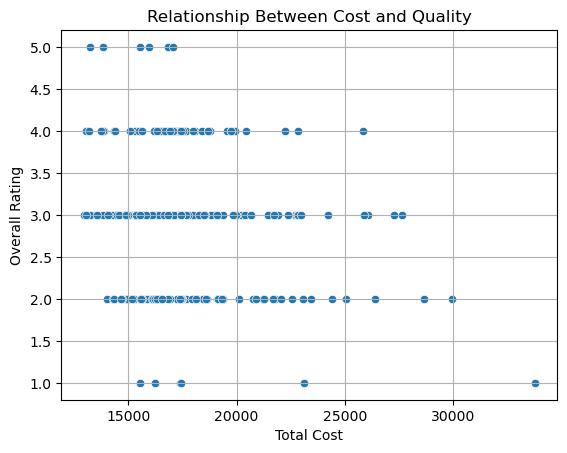

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming merged_tables is a pandas DataFrame
sns.scatterplot(data=merged_tables, x='Total_Cost', y='Overall_Rating')

plt.title('Relationship Between Cost and Quality')
plt.xlabel('Total Cost')
plt.ylabel('Overall Rating')
plt.grid(True)
plt.show()

In [20]:
from scipy.stats import pearsonr

# Assuming merged_tables is a pandas DataFrame
total_cost = merged_tables['Total_Cost']
overall_rating = merged_tables['Overall_Rating']

# Perform the correlation test
cost_rating_corr, p_value = pearsonr(total_cost, overall_rating)

print("Correlation coefficient:", cost_rating_corr)
print("P-value:", p_value)

Correlation coefficient: -0.22086040980470614
P-value: 0.0009735886274857233


Based on the graph, hospitals with the highest total cost seem to have a lower overall rating. As the overall rating increases, the total cost seems to be decreasing. To further explore this correlation, I decided to do a correlation test. Our p-value is .0031, which is less than .05. This means that our results are significant enough to conclude that overall rating and total cost are negatively correlated. I.E. When total costs increase, overall rating decreases. Our p-value is .0031, and our correlation coefficient is -.209. This seems counter intuitive because total costs is the average total payments given to the provider. You would expect something that is more expensive to result in having a higher overall rating. Our data concludes that this is not correct. This data is only looking at hospitals in CA. Potentially, if we included the entire nation we could see different results.

**Let's do another analysis of the relationship between Cost and Patient Experience**

H0: There is no correlation between the total cost and patient experience.

HA: There is a correlation between the total cost and patient experience.

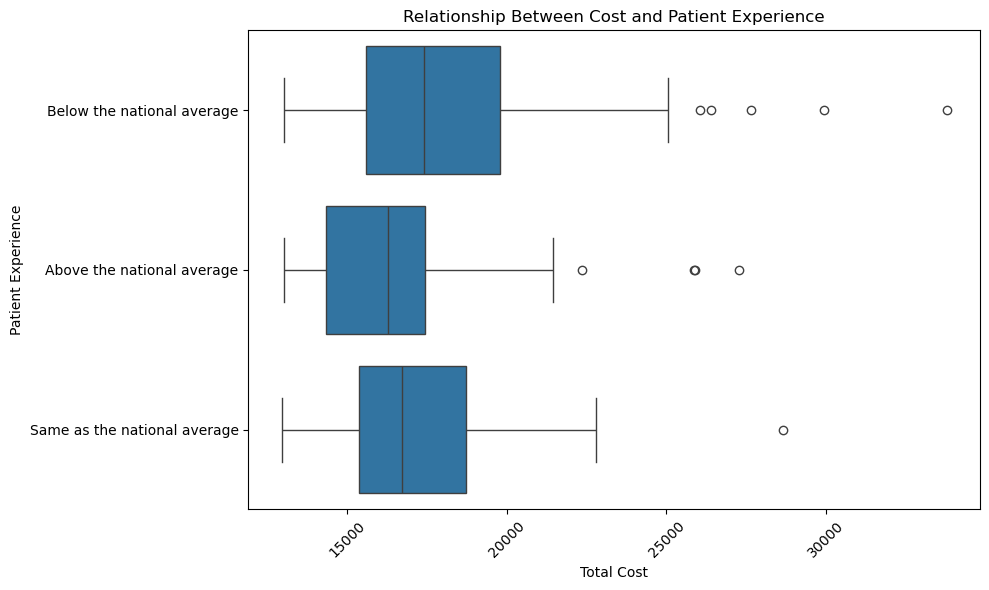

In [23]:
# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Cost', y='Patient experience national comparison', data=merged_tables)
plt.title('Relationship Between Cost and Patient Experience')
plt.xlabel('Total Cost')
plt.ylabel('Patient Experience')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [24]:
# Assuming merged_tables is a pandas DataFrame
merged_tables['Numeric_Experience'] = merged_tables['Patient experience national comparison'].map({
    "Below the national average": 0,
    "Same as the national average": 1,
    "Above the national average": 2
})

# Ensure Numeric_Experience is numeric
merged_tables['Numeric_Experience'] = pd.to_numeric(merged_tables['Numeric_Experience'])

# Calculate the correlation
cost_experience_corr, p_value = pearsonr(merged_tables['Total_Cost'], merged_tables['Numeric_Experience'])

print("Correlation coefficient:", cost_experience_corr)
print("P-value:", p_value)

Correlation coefficient: -0.12515069313791177
P-value: 0.06388207725021786


The relationship between Total Cost and Patient experience national comparison is slightly negatively correlated, r = -.13, and the p-value is 0.06. This means there is not enough evidence to state a significant correlation between these two variables, so we fail to reject the null hypothesis. For there to be no significant evidence pointing to these values correlating is certainly confusing. My original belief was that when total costs increases, the hospital itself, faculty, and resources the hospital has increases. This does not seem to correlate based on my data. When looking at the box plot for these variables, hospitals with an above the national average patient experience have the least median, Q1, and Q3 values. This could still potentially show that as total cost increases, the patient experience decreases. However, there is no statistical evidence to support this claim. These results do not make sense because if someone is paying more money, it would be reasonable to conclude that they would have a better patient experience. However, our data concludes that there is no significant correlation between these two variables. Potentially, increasing total costs of a hospital leads to a hospital seeing more patients, which leads to less focus on individual patients. This could be one reason why patient experience does not correlate with total cost. Furthermore, these values are only looking at hospitals from CA. If we include the total hospitals across the nation we may get different results.

**Let's analyze the relationship between Cost and Timeliness**

H0: There is no correlation between the total cost and timeliness.

HA: There is a correlation between the total cost and timeliness.

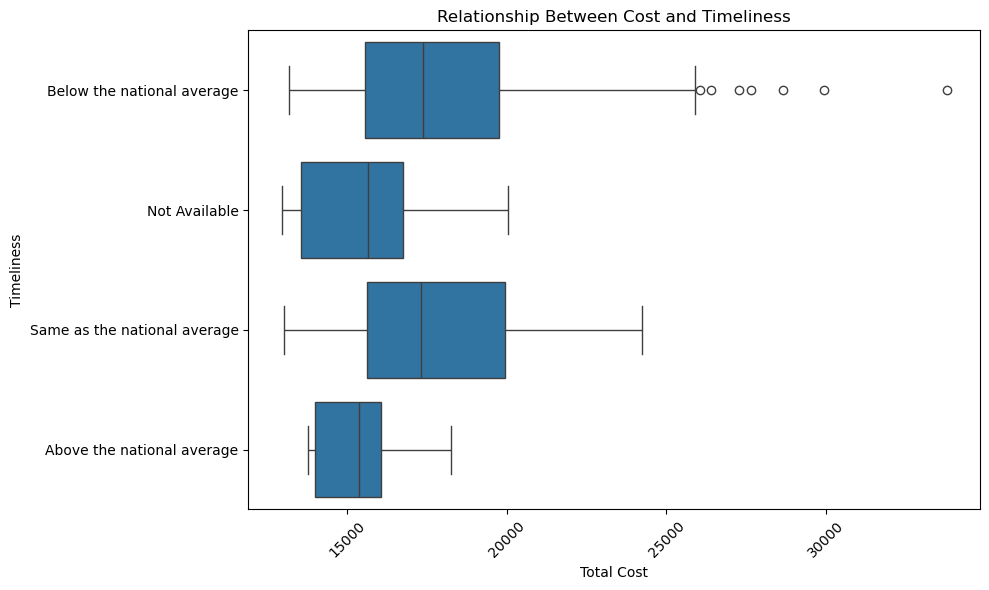

In [27]:
#Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Cost', y='Timeliness of care national comparison', data=merged_tables)
plt.title('Relationship Between Cost and Timeliness')
plt.xlabel('Total Cost')
plt.ylabel('Timeliness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Remove the "Not Available" box plot.**

In [29]:
merged_tables = merged_tables[merged_tables['Timeliness of care national comparison'] != 'Not available']
merged_tables['Timeliness of care national comparison'].unique()

array(['Below the national average', 'Not Available',
       'Same as the national average', 'Above the national average'],
      dtype=object)

**This did not seem to work. Lets make sure all values are in lowercase and have no spaces before or after each value name within the 'Timeliness of care nation comparison' column.**

In [31]:
merged_tables['Timeliness of care national comparison'] = merged_tables['Timeliness of care national comparison'].str.lower()
merged_tables['Timeliness of care national comparison'].unique()

array(['below the national average', 'not available',
       'same as the national average', 'above the national average'],
      dtype=object)

**Now lets remove the not available column.**

In [33]:
merged_tables = merged_tables[merged_tables['Timeliness of care national comparison'] != 'not available']

# Display the unique values again to confirm the rows have been dropped
unique_values_cleaned = merged_tables['Timeliness of care national comparison'].unique()
print(unique_values_cleaned)

['below the national average' 'same as the national average'
 'above the national average']


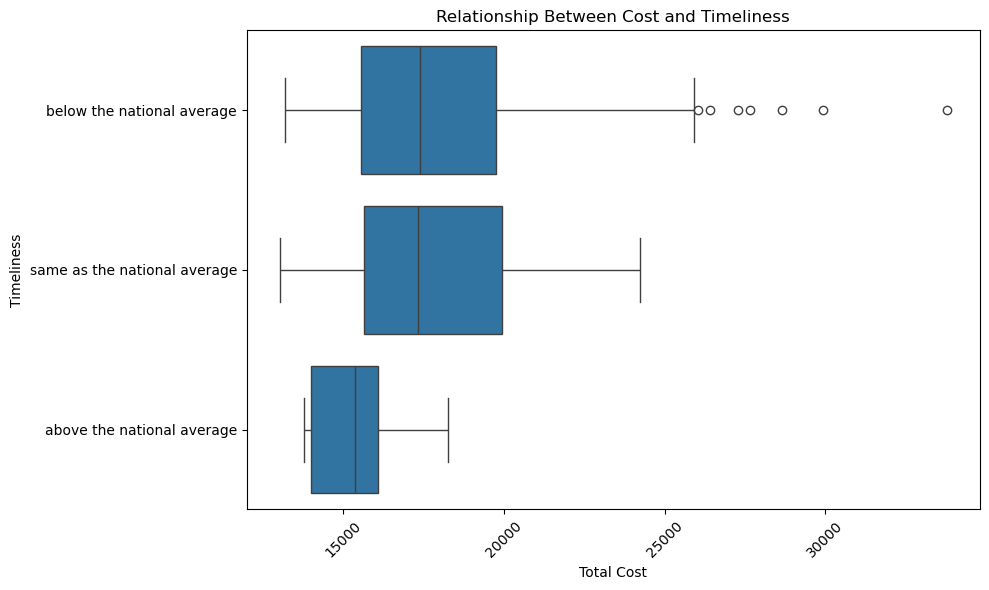

In [34]:
#Create the Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Cost', y='Timeliness of care national comparison', data=merged_tables)
plt.title('Relationship Between Cost and Timeliness')
plt.xlabel('Total Cost')
plt.ylabel('Timeliness')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
# Assuming merged_tables is a pandas DataFrame
merged_tables['Numeric_Timeliness'] = merged_tables['Timeliness of care national comparison'].map({
    'below the national average': 0,
    'same as the national average': 1,
    'above the national average': 2
})

# Ensure Numeric_Timeliness is numeric
merged_tables['Numeric_Timeliness'] = pd.to_numeric(merged_tables['Numeric_Timeliness'])

# Calculate the correlation
cost_timeliness_corr, p_value = pearsonr(merged_tables['Total_Cost'], merged_tables['Numeric_Timeliness'])

print(f'Correlation: {cost_timeliness_corr}, P-value: {p_value}')

Correlation: -0.1265027210742144, P-value: 0.07574576582331682


The relationship between Total Cost and Timeliness of care is also slightly negatively correlated, r = -.13. However, the p-value for this test is .076, which is still greater than a p-value of .05. This test fails to reject the null hypothesis. This test does not give us enough evidence to conclude a significant correlation between total cost and timeliness of care. When looking at the box plot, similar to patient experience, hospitals with an above national average for timeliness of care have the lowest median, Q1, and Q3 values compared to same and below the national average. Once again, this could show that as costs increase, timeliness of care decreases. However, there is no statistical evidence that supports this conclusion. These results are based on hospitals within CA, so expanding this test to include all hospitals in the nation could lead to different results.

My results do illustrate that there is no significant correlation between total cost and timeliness of care or patient experience. This is not a great sign because a patient will pay more money for either the same care (if we interpret the statistical evidence) or decreased care (if we loosely interpret our visual evidence). Overall, this is the complete opposite result as to what I expected, and I feel as if this data needs to be investigated more to find more interesting statistical evidence!